Load the dependencies

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Read and do basic EDA on DF

In [105]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [106]:
df.shape

(2290, 6)

In [107]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [108]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [109]:
df.Date.value_counts()

1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: Date, Length: 2290, dtype: int64

Removing Day as most probably it wont be relevant 

In [110]:
def date_numeric(x):
    val =""
    x = x.split("/")
    if len(x[1]) == 1:
        val =  x[2] + "0" +x[1]
    else:
        val =  x[2] + x[1]
    return val

In [111]:
df.Date = df.Date.apply(date_numeric)

In [112]:
df.Date = df.Date.astype(float)

In [113]:
df.dtypes

Date       float64
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

Find corelation

In [114]:
corelation = df.corr()
corelation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944130,0.206598,-0.775810,-0.172449,-0.791401
SPX,0.944130,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.206598,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.775810,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.172449,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.791401,-0.672017,-0.024375,0.829317,0.321631,1.000000


Plot Heatmap

<Axes: >

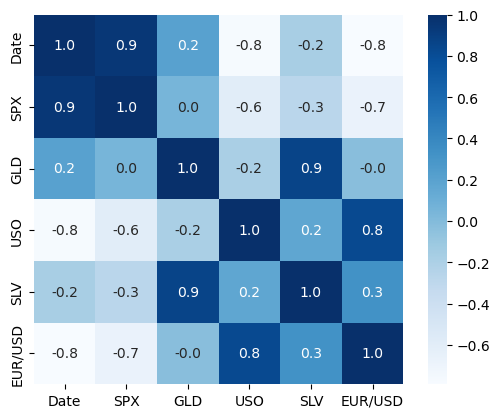

In [115]:
sns.heatmap(corelation,annot =True,fmt = ".1f", square = True,cmap="Blues")

In [116]:
# correlation values of GLD
print(corelation['GLD'])

Date       0.206598
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

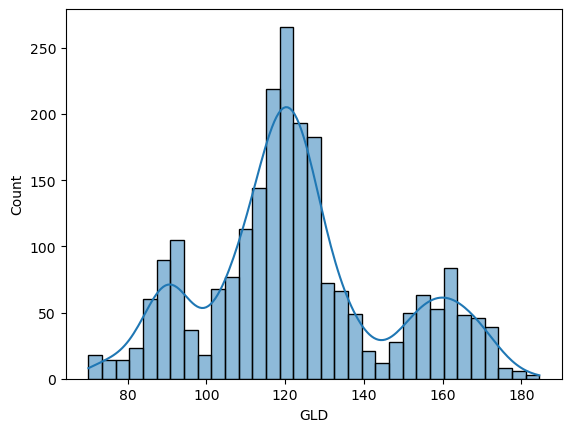

In [117]:
sns.histplot(df.GLD,kde=True)
# kde = true is used for plotting curve similar to ditplot
# distplot not used as it is deprecated now

Splitting features and Traget

In [118]:
X = df.drop("GLD", axis = 1)
Y = df["GLD"]
print(X.shape,Y.shape)

(2290, 5) (2290,)


In [119]:
X

,Date,SPX,USO,SLV,EUR/USD
0,200802.0,1447.160034,78.470001,15.1800,1.471692
1,200803.0,1447.160034,78.370003,15.2850,1.474491
2,200804.0,1411.630005,77.309998,15.1670,1.475492
3,200807.0,1416.180054,75.500000,15.0530,1.468299
4,200808.0,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,201808.0,2671.919922,14.060000,15.5100,1.186789
2286,201809.0,2697.790039,14.370000,15.5300,1.184722
2287,201810.0,2723.070068,14.410000,15.7400,1.191753
2288,201814.0,2730.129883,14.380000,15.5600,1.193118


Apply Train Test split

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2,random_state = 1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1832, 5) (458, 5) (1832,) (458,)


Model Training

In [121]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,Y_train)

RandomForestRegressor()

Compare the Actual Values and Predicted Values in a Plot

In [122]:
X_train_predicted = rfr.predict(X_train)

In [123]:
error_score = metrics.r2_score(Y_train,X_train_predicted)
error_score

0.9991537016510509

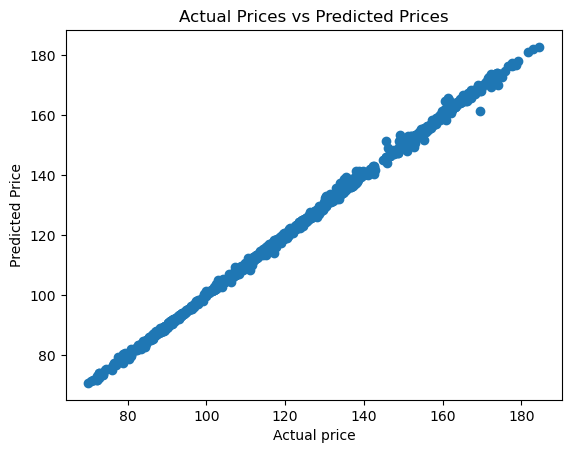

In [124]:
plt.scatter(Y_train,X_train_predicted)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [125]:
X_test_predicted = rfr.predict(X_test)


In [126]:
error_score = metrics.r2_score(Y_test,X_test_predicted)
error_score

0.9893841688705415

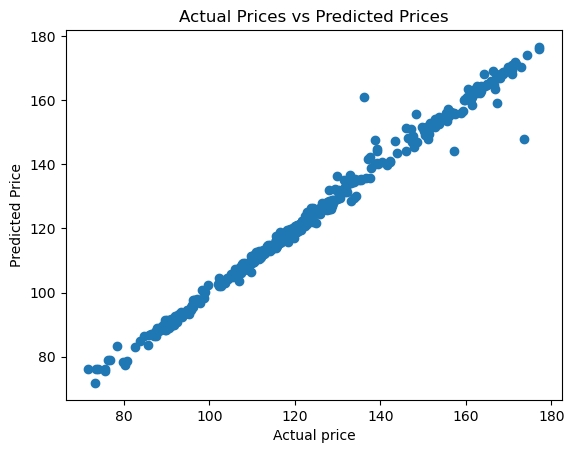

In [127]:
plt.scatter(Y_test,X_test_predicted)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

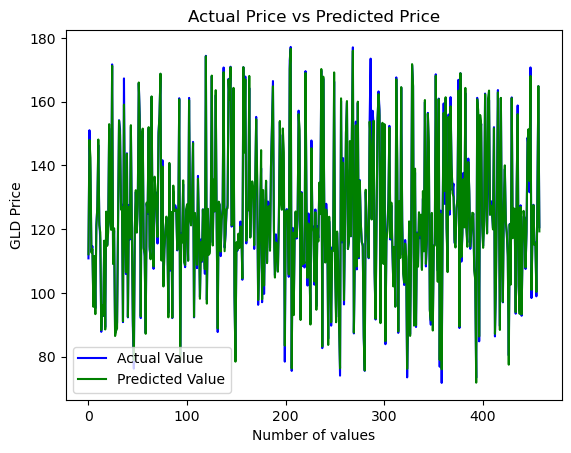

In [129]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(X_test_predicted, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()